In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

from qiskit.tools.jupyter import *
from qiskit import IBMQ
IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-oxford', group='on-boarding', project='on-boarding-proj') 

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

/home/sebastian/anaconda/envs/Quiskit/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


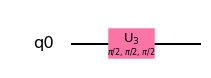

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw(output='mpl')

In [3]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

In [4]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print('{} has {} queued and {} qubits'.format(backend.name(),backend.status().pending_jobs,qubit_count) )

ibmq_qasm_simulator has 3 queued and simulated qubits
ibmq_16_melbourne has 38 queued and 15 qubits
ibmq_vigo has 28 queued and 5 qubits
ibmq_ourense has 23 queued and 5 qubits
ibmq_valencia has 17 queued and 5 qubits
ibmq_rochester has 15 queued and 53 qubits
ibmq_armonk has 12 queued and 1 qubits
ibmq_cambridge has 6 queued and 28 qubits
ibmq_paris has 30 queued and 27 qubits
ibmq_rome has 23 queued and 5 qubits
ibmq_toronto has 53 queued and 27 qubits
ibmq_santiago has 27 queued and 5 qubits
ibmq_bogota has 8 queued and 5 qubits
ibmq_manhattan has 9 queued and 65 qubits


## Bayes net (i)
P(A = 0) = 0.2

P(A = 1) = 0.8


P(B = 0) = 0.3

P(B = 1) = 0.7



P(C = 0|A=0,B=0) = 0.15

P(C = 0|A=0,B=1) = 0.3

P(C = 0|A=1,B=0) = 0.4

P(C = 0|A=1,B=1) = 0.1



P(C = 1|A=0,B=0) = 0.85

P(C = 1|A=0,B=1) = 0.7

P(C = 1|A=1,B=0) = 0.6

P(C = 1|A=1,B=1) = 0.9

### Rotation angle computation
By applying an RY-gate with an appropriate angle, the probabilities of the  root  node  can  be  mapped  to  the  probabilities  (and  thus  probability  amplitudes) of the basis states.
Two-state root nodes can we represented by an RY gate with rotation angle $ = 2*tan^{-1}\sqrt{\frac{P(V_{i}=1)}{P(V_{i}=0)})}$.



Therefore, for Bayes net (i), the rotation angles are $\theta_{A} = 2*tan^{-1}(\frac{0.8}{0.2}) = 2.214$ and $\theta_{B} = 2*tan^{-1}(\frac{0.7}{0.3}) = 1.982$.

For the child nodes,
\begin{equation}
\theta_{V_{i},\Pi_{V_{I}}^{*}} = 2 * tan^{-1}\left(\sqrt{\frac{P(V_{i}=1|\Pi_{V_{i}}=\Pi_{V_{i}}^{*})}{P(V_{i}=0|\Pi_{V_{i}}=\Pi_{V_{i}}^{*})}}\right)
\end{equation}

 The  conditional  probabilities  associated  with  childnodes  are  realized  through  controlled  rotations. 

Thus,

$\theta(C|A=0,B=0) = 2.348$

$\theta(C|A=0,B=1) = 1.982$

$\theta(C|A=1,B=0) = 1.772$

$\theta(C|A=1,B=1) = 2.498$



